In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error

In [17]:
# Creating a datasets
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

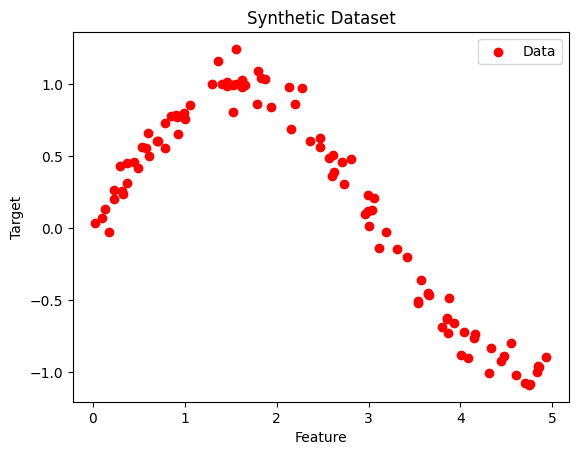

In [18]:
plt.scatter(X,y, color="red", label="Data")
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [20]:
model = DecisionTreeRegressor(random_state=42)

In [24]:
param_grid = {
    "criterion":["squared_error","friedman_mse","absolute_error","poisson"],
    "splitter":["best","random"],
    "max_depth":range(1,10,1),
    "min_samples_leaf":range(1,20,2),
    "min_samples_split":range(2,20,2),
} 

In [25]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=True
    )

In [26]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


c:\Users\dipak\.conda\envs\env2\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
8100 fits failed out of a total of 32400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dipak\.conda\envs\env2\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dipak\.conda\envs\env2\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dipak\.conda\envs\env2\Lib\site-packages\sklearn\tree\_classes.py", line 1

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']},
             verbose=True)

In [30]:
# best_model = grid_search.best_estimator_
best_model = DecisionTreeRegressor(criterion="absolute_error", max_depth=7, random_state=42)

In [31]:
best_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7, random_state=42)

In [32]:
prediction = best_model.predict(X_test)

In [34]:
error = mean_squared_error(y_test,prediction)

In [35]:
print("error: ",error)

error:  0.011133972513755473


In [36]:
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test,prediction)

In [38]:
print("Score: ", score)

Score:  0.9772584454789888


In [40]:
X_grid = np.arange(min(X), max(X), 0.01)[:,np.newaxis]
y_grid = best_model.predict(X_grid)

C:\Users\dipak\AppData\Local\Temp\ipykernel_10812\156294083.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:,np.newaxis]


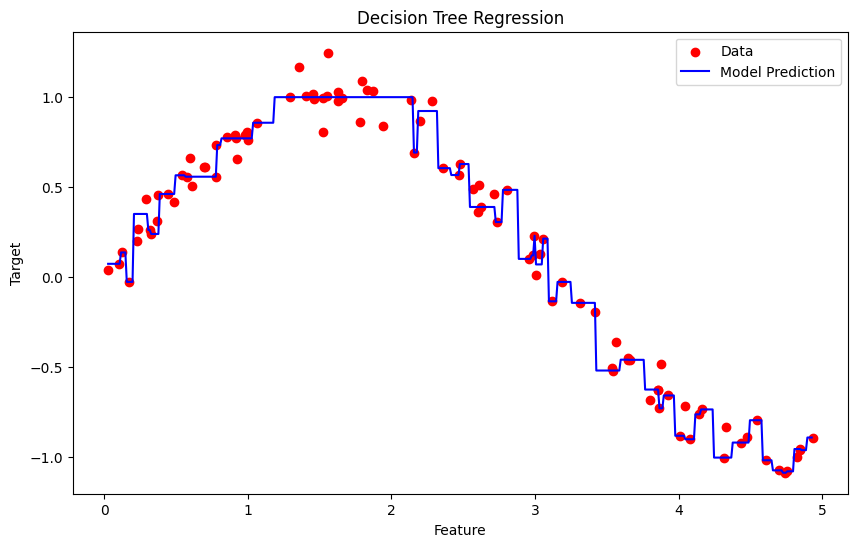

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color="red", label="Data")
plt.plot(X_grid,y_grid,color="blue",label="Model Prediction")
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [44]:
from sklearn.tree import plot_tree

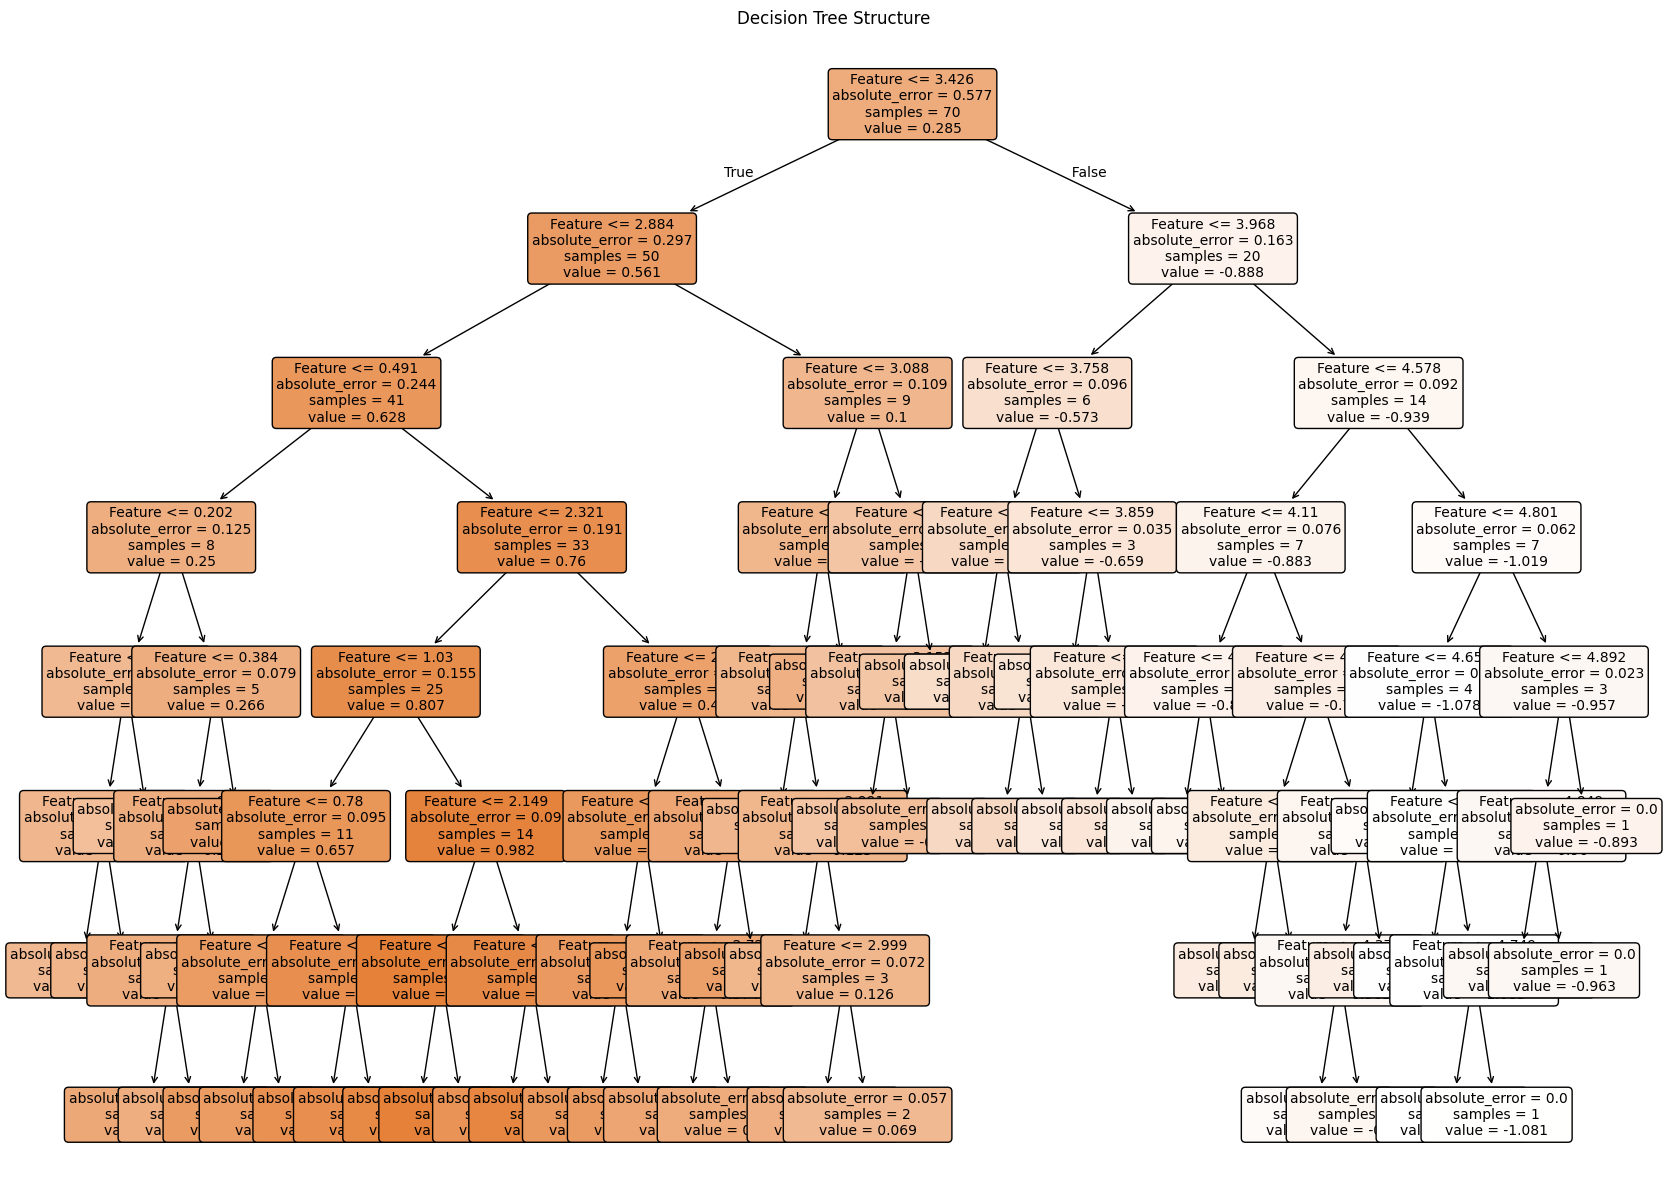

In [52]:
plt.figure(figsize=(20,15))
plot_tree(
    best_model,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()
